In [34]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [35]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd

# Define the path to the ChromeDriver executable
chrome_driver_path = r"C:\Users\wendy\Downloads\chromedriver\chromedriver\chromedriver.exe"

# Set Chrome options
chrome_options = Options()
#chrome_options.add_argument("--headless")  # Run in headless mode
#chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
#chrome_options.add_argument("--no-sandbox")  # Bypass OS security model

# Create a Service object
service = Service(chrome_driver_path)

# Initialize the WebDriver using the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL to scrape
url = 'http://aklc.hydrotel.co.nz:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=1&format=html&ts_id=2860&from=2006-01-01'  # Replace with the actual URL
driver.get(url)

# Find all rows with class "even" and "odd"
rows = driver.find_elements(By.XPATH, '//tr[@class="even" or @class="odd"]')

# Extract data
data_tuples = []
for row in rows:
  cells = row.find_elements(By.TAG_NAME, 'td')
  timestamp = cells[0].text
  value = cells[1].text
  data_tuples.append((timestamp, value))

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=['Timestamp', 'Value'])

# Close the WebDriver
driver.quit()

# Display the DataFrame
print(df)
df.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024.csv', index = False)

                            Timestamp Value
0       2006-01-01T00:00:00.000+12:00   1.2
1       2006-01-01T01:00:00.000+12:00   0.8
2       2006-01-01T02:00:00.000+12:00   0.5
3       2006-01-01T03:00:00.000+12:00   0.4
4       2006-01-01T04:00:00.000+12:00   0.4
...                               ...   ...
153908  2024-11-06T20:00:00.000+12:00   8.9
153909  2024-11-06T21:00:00.000+12:00   9.2
153910  2024-11-06T22:00:00.000+12:00   9.6
153911  2024-11-06T23:00:00.000+12:00   9.2
153912  2024-11-07T00:00:00.000+12:00   7.6

[153913 rows x 2 columns]


In [36]:
df

,Timestamp,Value
0,2006-01-01T00:00:00.000+12:00,1.2
1,2006-01-01T01:00:00.000+12:00,0.8
2,2006-01-01T02:00:00.000+12:00,0.5
3,2006-01-01T03:00:00.000+12:00,0.4
4,2006-01-01T04:00:00.000+12:00,0.4
...,...,...
153908,2024-11-06T20:00:00.000+12:00,8.9
153909,2024-11-06T21:00:00.000+12:00,9.2
153910,2024-11-06T22:00:00.000+12:00,9.6
153911,2024-11-06T23:00:00.000+12:00,9.2


In [38]:
df.tail(100)

,Timestamp,Value
153813,2024-11-02T21:00:00.000+12:00,1.9
153814,2024-11-02T22:00:00.000+12:00,1.3
153815,2024-11-02T23:00:00.000+12:00,0.9
153816,2024-11-03T00:00:00.000+12:00,0.7
153817,2024-11-03T01:00:00.000+12:00,0.9
...,...,...
153908,2024-11-06T20:00:00.000+12:00,8.9
153909,2024-11-06T21:00:00.000+12:00,9.2
153910,2024-11-06T22:00:00.000+12:00,9.6
153911,2024-11-06T23:00:00.000+12:00,9.2


In [39]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('NO2_07112024.csv')

# Display the first few rows
print(data.head())
print (data.tail())

                       Timestamp  Value
0  2006-01-01T00:00:00.000+12:00    1.2
1  2006-01-01T01:00:00.000+12:00    0.8
2  2006-01-01T02:00:00.000+12:00    0.5
3  2006-01-01T03:00:00.000+12:00    0.4
4  2006-01-01T04:00:00.000+12:00    0.4
                            Timestamp  Value
153908  2024-11-06T20:00:00.000+12:00    8.9
153909  2024-11-06T21:00:00.000+12:00    9.2
153910  2024-11-06T22:00:00.000+12:00    9.6
153911  2024-11-06T23:00:00.000+12:00    9.2
153912  2024-11-07T00:00:00.000+12:00    7.6


In [40]:
# Display the summary information of the dataset, including data types and non-null counts
print("\nSummary information of the dataset:")
df.info()

# Display basic statistical details like mean, median, standard deviation, etc., for numeric columns
print("\nBasic statistical details for numeric columns:")
df.describe()

# Display data types
print(df.dtypes)
print(df.shape)


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153913 entries, 0 to 153912
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  153913 non-null  object
 1   Value      153913 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB

Basic statistical details for numeric columns:
Timestamp    object
Value        object
dtype: object
(153913, 2)


In [41]:
# Convert 'Value' to numeric, forcing errors to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [42]:
# Display data types
print(df.dtypes)
print(df.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
dtype: object
(153913, 2)


In [43]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Timestamp       0
Value        6124
dtype: int64


In [44]:
# Fill missing values
#df['Value'] = df['Value'].fillna(method='ffill')
df['Value'] = df['Value'].fillna(df['Value'].mean())

In [45]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Timestamp    0
Value        0
dtype: int64


In [46]:
# Check the number of duplicate rows
print("Number of duplicate rows before removing duplicates:", df.duplicated().sum())

Number of duplicate rows before removing duplicates: 0


In [49]:
# Feature Engineering
# Extract date and time components
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
# Convert 'Timestamp' to datetime
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = pd.to_datetime(df['Date'])

# Display the transformed DataFrame
print(df.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [50]:
# Display data types
print(df.dtypes)
print(df.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int32
Month                            int32
Day                              int32
Hour                             int32
Date                    datetime64[ns]
dtype: object
(153913, 7)


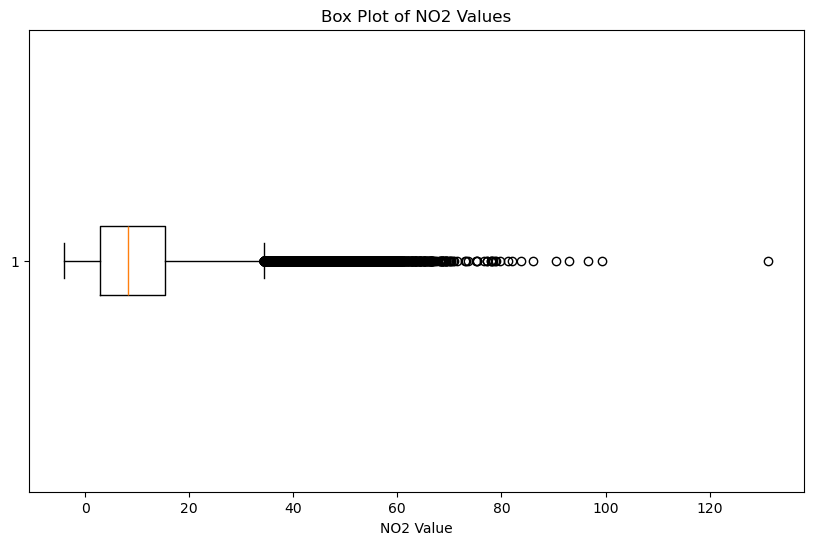

In [51]:
# Checking and Handling Outliners 

# Method 1: Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Value'], vert=False)
plt.title('Box Plot of NO2 Values')
plt.xlabel('NO2 Value')
plt.show()


In [59]:
from scipy import stats
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

In [54]:

# Method 2: Z-Score
df['Z-Score'] = zscore(df['Value'])
outliers_z = df[np.abs(df['Z-Score']) > 3]
print("Outliers detected using Z-Score method:")
print(outliers_z)


Outliers detected using Z-Score method:
                       Timestamp  Value  Year  Month  Day  Hour       Date  \
952    2006-02-09 16:00:00+12:00   45.3  2006      2    9    16 2006-02-09   
1736   2006-03-14 08:00:00+12:00   48.5  2006      3   14     8 2006-03-14   
1839   2006-03-18 15:00:00+12:00   45.4  2006      3   18    15 2006-03-18   
1882   2006-03-20 10:00:00+12:00   43.1  2006      3   20    10 2006-03-20   
1888   2006-03-20 16:00:00+12:00   45.9  2006      3   20    16 2006-03-20   
...                          ...    ...   ...    ...  ...   ...        ...   
152263 2024-08-30 07:00:00+12:00   52.6  2024      8   30     7 2024-08-30   
152264 2024-08-30 08:00:00+12:00   65.1  2024      8   30     8 2024-08-30   
152265 2024-08-30 09:00:00+12:00   46.9  2024      8   30     9 2024-08-30   
152503 2024-09-09 07:00:00+12:00   57.0  2024      9    9     7 2024-09-09   
152504 2024-09-09 08:00:00+12:00   59.1  2024      9    9     8 2024-09-09   

         Z-Score  
952 

In [64]:
# Define a threshold for outlier detection (e.g., z-score > 3)
z_threshold = 3

# Calculate z-scores for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Identify outliers by z-score
outliers = (abs(z_scores) > z_threshold).any(axis=1)

print("Outliers detected using z-score method:")
print(outliers)


Outliers detected using z-score method:
0         False
1         False
2         False
3         False
4         False
          ...  
153908    False
153909    False
153910    False
153911    False
153912    False
Length: 153913, dtype: bool


In [65]:
# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (151364, 8)


In [66]:
df1 = df_no_outliers.copy()
df1.shape


(151364, 8)

In [71]:
# Drop the 'Z-Score' column
df_cleaned = df1.drop(columns=['Z-Score'])
print(df_cleaned.head())


                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [72]:
df_cleaned.shape


(151364, 7)

In [73]:
# Save the cleaned data into new csv file so it's easy to recall later on 
df_cleaned.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024_NoOutliers.csv', index=False)


In [75]:
print(df.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

    Z-Score  
0 -0.930644  
1 -0.968766  
2 -0.997357  
3 -1.006888  
4 -1.006888  


In [78]:
print(df.shape)

(153913, 8)


In [79]:
# Drop the 'Z-Score' column
df_WithOutliers = df.drop(columns=['Z-Score'])
print(df_WithOutliers.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [80]:
print(df_WithOutliers.shape)

(153913, 7)


In [81]:
# Save the the data with outliers into new csv file so it's easy to recall later on 
df_WithOutliers.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024_WithOutliers.csv', index=False)

In [74]:
# Load the CSV file
data_cleaned = pd.read_csv('NO2_07112024_NoOutliers.csv')

# Display the first few rows
print(data_cleaned.head())
print (data_cleaned.tail())

                   Timestamp  Value  Year  Month  Day  Hour        Date
0  2006-01-01 00:00:00+12:00    1.2  2006      1    1     0  2006-01-01
1  2006-01-01 01:00:00+12:00    0.8  2006      1    1     1  2006-01-01
2  2006-01-01 02:00:00+12:00    0.5  2006      1    1     2  2006-01-01
3  2006-01-01 03:00:00+12:00    0.4  2006      1    1     3  2006-01-01
4  2006-01-01 04:00:00+12:00    0.4  2006      1    1     4  2006-01-01
                        Timestamp  Value  Year  Month  Day  Hour        Date
151359  2024-11-06 20:00:00+12:00    8.9  2024     11    6    20  2024-11-06
151360  2024-11-06 21:00:00+12:00    9.2  2024     11    6    21  2024-11-06
151361  2024-11-06 22:00:00+12:00    9.6  2024     11    6    22  2024-11-06
151362  2024-11-06 23:00:00+12:00    9.2  2024     11    6    23  2024-11-06
151363  2024-11-07 00:00:00+12:00    7.6  2024     11    7     0  2024-11-07


In [82]:
# Load the CSV file
data = pd.read_csv('NO2_07112024_WithOutliers.csv')

# Display the first few rows
print(data.head())
print (data.tail())

                   Timestamp  Value  Year  Month  Day  Hour        Date
0  2006-01-01 00:00:00+12:00    1.2  2006      1    1     0  2006-01-01
1  2006-01-01 01:00:00+12:00    0.8  2006      1    1     1  2006-01-01
2  2006-01-01 02:00:00+12:00    0.5  2006      1    1     2  2006-01-01
3  2006-01-01 03:00:00+12:00    0.4  2006      1    1     3  2006-01-01
4  2006-01-01 04:00:00+12:00    0.4  2006      1    1     4  2006-01-01
                        Timestamp  Value  Year  Month  Day  Hour        Date
153908  2024-11-06 20:00:00+12:00    8.9  2024     11    6    20  2024-11-06
153909  2024-11-06 21:00:00+12:00    9.2  2024     11    6    21  2024-11-06
153910  2024-11-06 22:00:00+12:00    9.6  2024     11    6    22  2024-11-06
153911  2024-11-06 23:00:00+12:00    9.2  2024     11    6    23  2024-11-06
153912  2024-11-07 00:00:00+12:00    7.6  2024     11    7     0  2024-11-07


In [83]:
# Display the summary information of the dataset, including data types and non-null counts
print("\nSummary information of the dataset:")
data_cleaned.info()

# Display basic statistical details like mean, median, standard deviation, etc., for numeric columns
print("\nBasic statistical details for numeric columns:")
data_cleaned.describe()

# Display data types and shapes
print(data_cleaned.dtypes)
print(data_cleaned.shape)


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151364 entries, 0 to 151363
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  151364 non-null  object 
 1   Value      151364 non-null  float64
 2   Year       151364 non-null  int64  
 3   Month      151364 non-null  int64  
 4   Day        151364 non-null  int64  
 5   Hour       151364 non-null  int64  
 6   Date       151364 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 8.1+ MB

Basic statistical details for numeric columns:
Timestamp     object
Value        float64
Year           int64
Month          int64
Day            int64
Hour           int64
Date          object
dtype: object
(151364, 7)


In [84]:
# Convert 'Timestamp' to datetime
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [85]:
# Display data types and shapes
print(data_cleaned.dtypes)
print(data_cleaned.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
dtype: object
(151364, 7)


C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


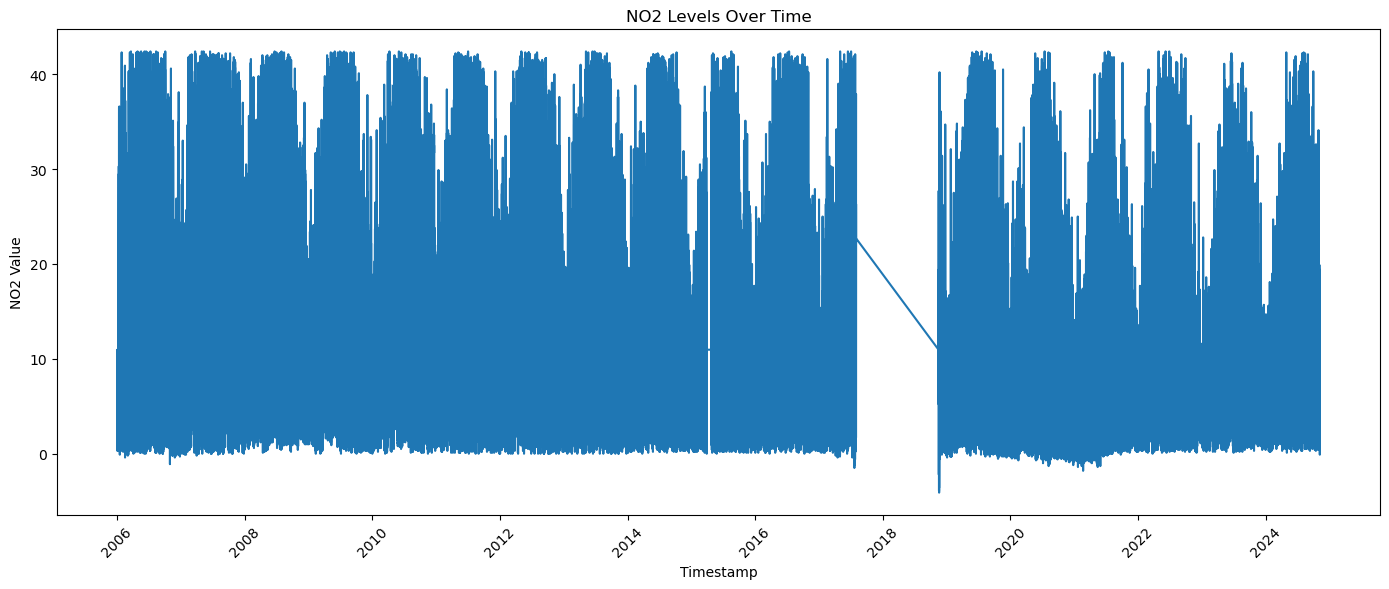

In [86]:
# Time Series Plot: Visualize the NO2 values over time
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_cleaned, x='Timestamp', y='Value')
plt.title('NO2 Levels Over Time')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


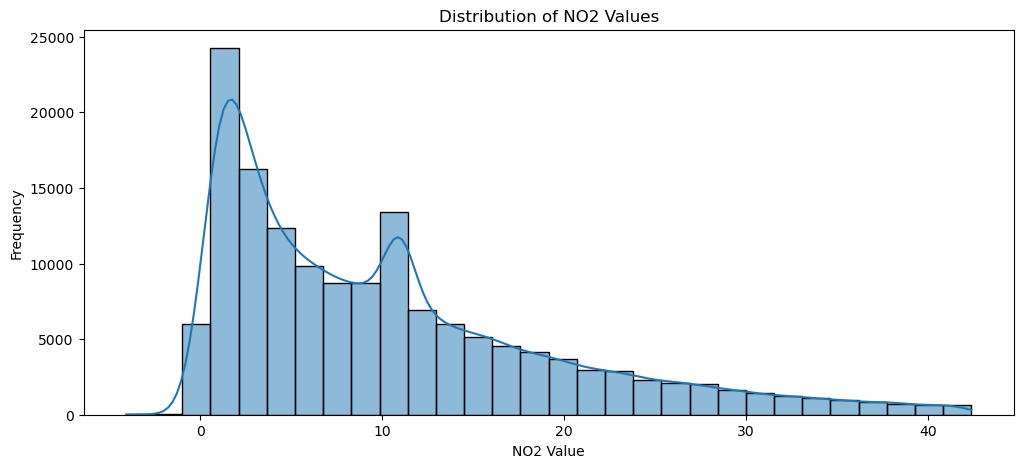

In [87]:
# Distribution Plot: Check the distribution of NO2 values
# Histogram of NO2 values
plt.figure(figsize=(12, 5))
sns.histplot(data_cleaned['Value'], bins=30, kde=True)
plt.title('Distribution of NO2 Values')
plt.xlabel('NO2 Value')
plt.ylabel('Frequency')
plt.show()

In [88]:
# Feature Enginering : Extract Weekday Information: Add a column to indicate whether the day is a weekday or weekend.
# We want to see the No2 values over the Weekdays vs Weekends patterns 

# Add a column for the day of the week
data_cleaned['DayOfWeek'] = data_cleaned['Timestamp'].dt.dayofweek

# Add a column to indicate if it's a weekend (Saturday=5, Sunday=6)
data_cleaned['IsWeekend'] = data_cleaned['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
# Display the transformed DataFrame
print(data_cleaned.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend  
0          6          1  
1          6          1  
2          6          1  
3          6          1  
4          6          1  


C:\Users\wendy\AppData\Local\Temp\ipykernel_14448\3679259117.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_cleaned, x='Timestamp', y='Value', hue='IsWeekend', palette='coolwarm', ci=None)
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


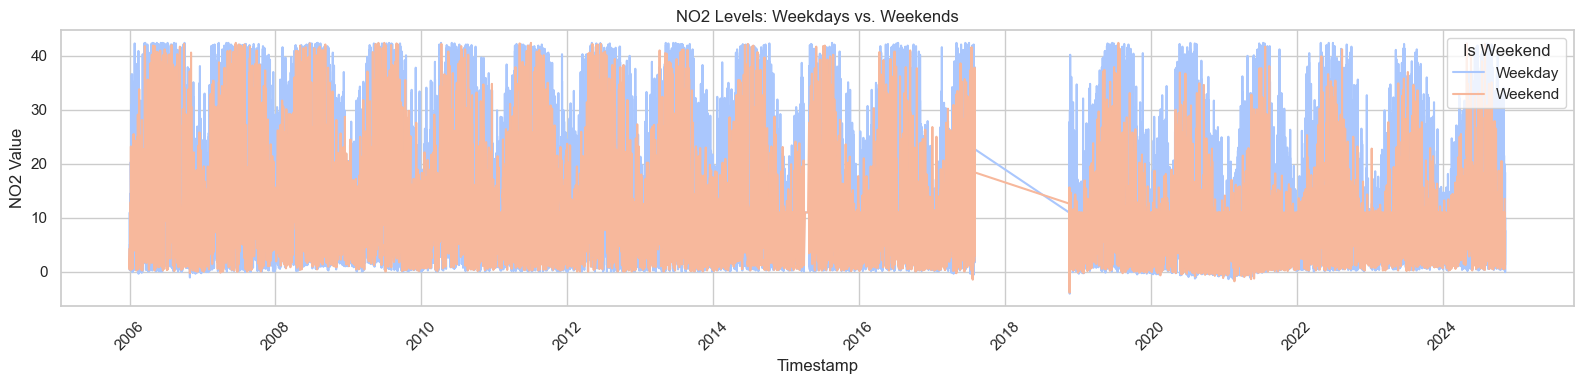

In [89]:
# Data Visualization : Plot NO2 Values for Weekdays vs. Weekends: Use line plots to compare the trends
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(16, 4))
sns.lineplot(data=data_cleaned, x='Timestamp', y='Value', hue='IsWeekend', palette='coolwarm', ci=None)
plt.title('NO2 Levels: Weekdays vs. Weekends')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.xticks(rotation=45)
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

In [90]:
# Summary Stats for Calculate Average NO2 Levels for Weekdays and Weekends:
# Display data types
print(data_cleaned.dtypes)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        int64
dtype: object


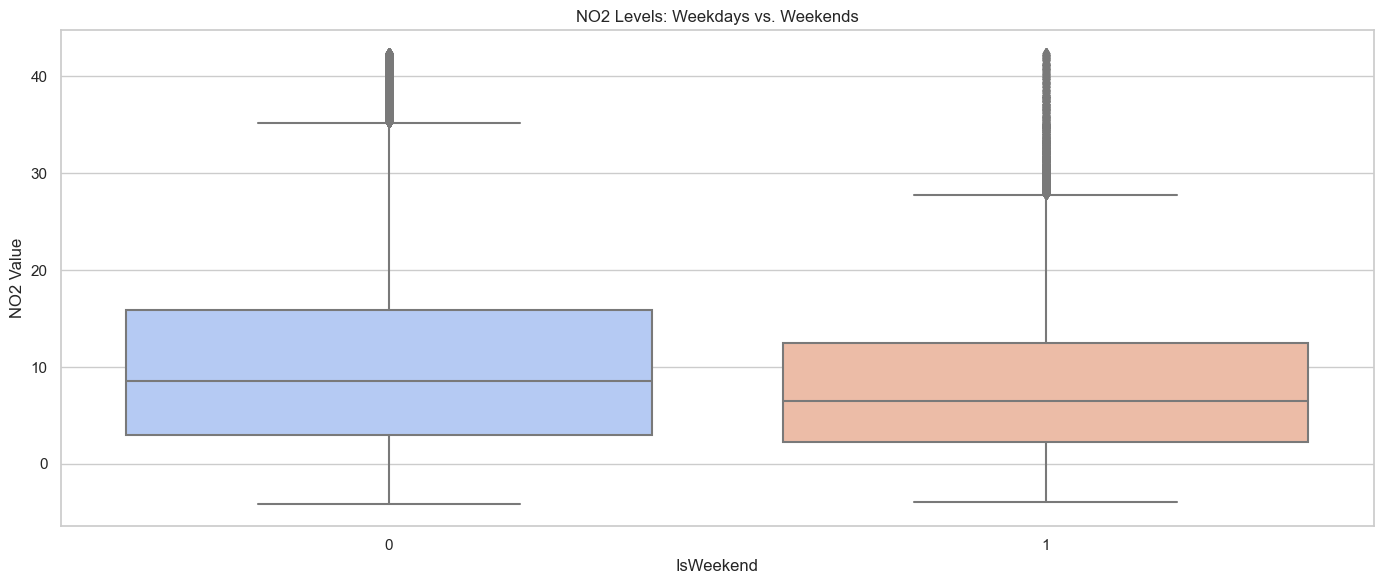

In [91]:
# Visualisation : Plot NO2 Levels for Weekdays vs. Weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_cleaned, x='IsWeekend', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Weekdays vs. Weekends')
plt.xlabel('IsWeekend')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [92]:

# Calculate mean NO2 values for weekdays and weekends
mean_values = data_cleaned.groupby('IsWeekend')['Value'].mean()
print("Average NO2 Levels:")
print(f"Weekdays: {mean_values[0]:.2f}")
print(f"Weekends: {mean_values[1]:.2f}")

Average NO2 Levels:
Weekdays: 10.94
Weekends: 8.79


In [93]:
# Define Peak and Off-Peak Hours
# Assume peak hours are from 7 AM to 9 AM and 4 PM to 6 PM, and off-peak hours are the rest.
# Define peak and off-peak hours
def categorize_time(hour):
  if 7 <= hour <= 9 or 16 <= hour <= 18:
      return 'Peak'
  else:
      return 'Off-Peak'

# Apply the function to create a new column
data_cleaned['Period'] = data_cleaned['Timestamp'].dt.hour.apply(categorize_time)
# Display the transformed DataFrame
print(data_cleaned.head())
# Display data types
print(data_cleaned.dtypes)

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend    Period  
0          6          1  Off-Peak  
1          6          1  Off-Peak  
2          6          1  Off-Peak  
3          6          1  Off-Peak  
4          6          1  Off-Peak  
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        

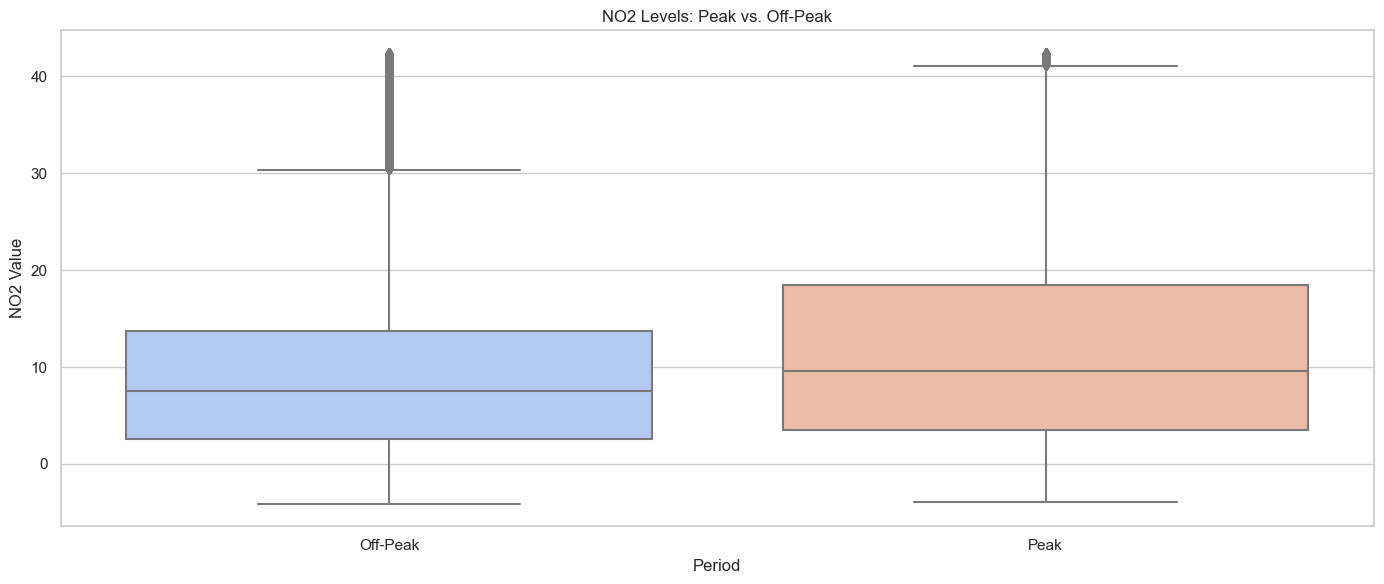

In [94]:
# Visualisation : Plot NO2 Levels for Peak vs. Off-Peak
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_cleaned, x='Period', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Peak vs. Off-Peak')
plt.xlabel('Period')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [95]:
# Calculate Average NO2 Levels for Peak and Off-Peak:
mean_values = data_cleaned.groupby('Period')['Value'].mean()
print("Average NO2 Levels:")
print(f"Peak: {mean_values['Peak']:.2f}")
print(f"Off-Peak: {mean_values['Off-Peak']:.2f}")

Average NO2 Levels:
Peak: 12.20
Off-Peak: 9.70


In [96]:
# Define Seasons : Assume winter months are June, July, and August, and summer months are December, January, and February.
# Define a function to categorize seasons
def categorize_season(month):
  if month in [6, 7, 8]:
      return 'Winter'
  elif month in [12, 1, 2]:
      return 'Summer'
  else:
      return 'Other'

# Apply the function to create a new column
data_cleaned['Season'] = data_cleaned['Timestamp'].dt.month.apply(categorize_season)
# Display the transformed DataFrame
print(data_cleaned.head())
# Display data types
print(data_cleaned.dtypes)

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend    Period  Season  
0          6          1  Off-Peak  Summer  
1          6          1  Off-Peak  Summer  
2          6          1  Off-Peak  Summer  
3          6          1  Off-Peak  Summer  
4          6          1  Off-Peak  Summer  
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek               

In [97]:
# Display data types
print(data_cleaned.dtypes)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        int64
Period                          object
Season                          object
dtype: object


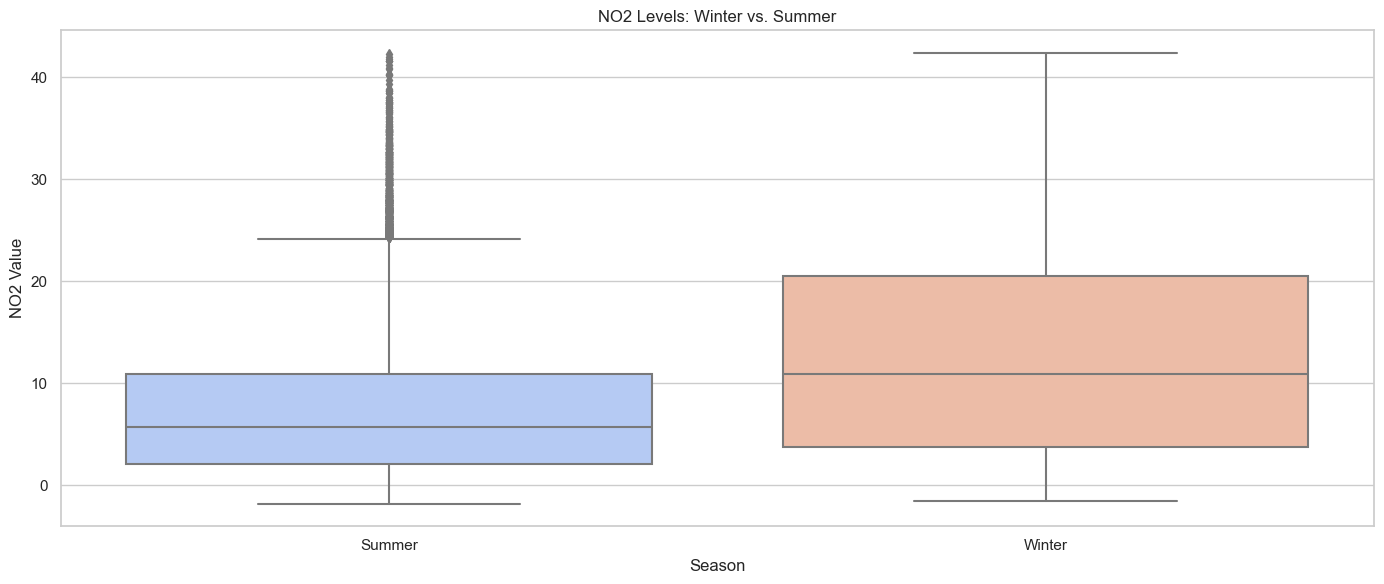

In [99]:
# Data Visualization : Plot NO2 Levels for Winter vs. Summer:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Filter data for Winter and Summer
seasonal_data = data_cleaned[data_cleaned['Season'].isin(['Winter', 'Summer'])]

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=seasonal_data, x='Season', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Winter vs. Summer')
plt.xlabel('Season')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [100]:
# Calculate mean NO2 values for winter and summer
mean_values = data_cleaned.groupby('Season')['Value'].mean()
print("Average NO2 Levels:")
print(f"Winter: {mean_values['Winter']:.2f}")
print(f"Summer: {mean_values['Summer']:.2f}")

Average NO2 Levels:
Winter: 13.36
Summer: 7.34


In [101]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [103]:
print(data_cleaned.shape)

(151364, 11)


In [111]:
# Select only the 'Timestamp' and 'Value' columns
data_selected = data_cleaned[['Timestamp', 'Value']]
print(data_selected.shape)
print(data_selected.dtypes)
print (data_selected.head())

(151364, 2)
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
dtype: object
                  Timestamp  Value
0 2006-01-01 00:00:00+12:00    1.2
1 2006-01-01 01:00:00+12:00    0.8
2 2006-01-01 02:00:00+12:00    0.5
3 2006-01-01 03:00:00+12:00    0.4
4 2006-01-01 04:00:00+12:00    0.4


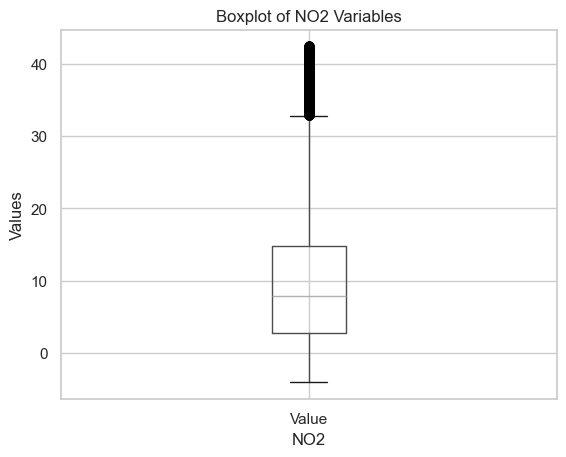

In [108]:
data_selected.boxplot()

# Set title and labels
plt.title('Boxplot of NO2 Variables')
plt.xlabel('NO2')
plt.ylabel('Values')

# Show the plot
plt.show()

In [117]:
# Convert 'Timestamp' to datetime
data_selected['Timestamp'] = pd.to_datetime(data_selected['Timestamp'])

# Format the 'Timestamp' to 'Date' format
data_selected['Date'] = data_selected['Timestamp'].dt.strftime('%-d/%m/%Y %H:%M')

# Display the result
print(data_selected[['Date']])

                             Date
0       2006-01-01 00:00:00+12:00
1       2006-01-01 01:00:00+12:00
2       2006-01-01 02:00:00+12:00
3       2006-01-01 03:00:00+12:00
4       2006-01-01 04:00:00+12:00
...                           ...
151359  2024-11-06 20:00:00+12:00
151360  2024-11-06 21:00:00+12:00
151361  2024-11-06 22:00:00+12:00
151362  2024-11-06 23:00:00+12:00
151363  2024-11-07 00:00:00+12:00

[151364 rows x 1 columns]


In [117]:
# Convert 'Timestamp' to datetime
data_selected['Timestamp'] = pd.to_datetime(data_selected['Timestamp'])

# Format the 'Timestamp' to 'Date' format
data_selected['Date'] = data_selected['Timestamp'].dt.strftime('%-d/%m/%Y %H:%M')

# Display the result
print(data_selected[['Date']])

                             Date
0       2006-01-01 00:00:00+12:00
1       2006-01-01 01:00:00+12:00
2       2006-01-01 02:00:00+12:00
3       2006-01-01 03:00:00+12:00
4       2006-01-01 04:00:00+12:00
...                           ...
151359  2024-11-06 20:00:00+12:00
151360  2024-11-06 21:00:00+12:00
151361  2024-11-06 22:00:00+12:00
151362  2024-11-06 23:00:00+12:00
151363  2024-11-07 00:00:00+12:00

[151364 rows x 1 columns]


In [127]:
# Extract date and time components
data_selected['Hour'] = data_selected['Timestamp'].dt.hour
data_selected['Date'] = data_selected['Timestamp'].dt.date 
#data_selected['DateHour'] = data_selected['Timestamp'].dt.strftime('%d/%m/%Y %H:%M') 


# Display the transformed DataFrame
print(data_selected.head())

                  Timestamp  Value        Date  Hour
0 2006-01-01 00:00:00+12:00    1.2  2006-01-01     0
1 2006-01-01 01:00:00+12:00    0.8  2006-01-01     1
2 2006-01-01 02:00:00+12:00    0.5  2006-01-01     2
3 2006-01-01 03:00:00+12:00    0.4  2006-01-01     3
4 2006-01-01 04:00:00+12:00    0.4  2006-01-01     4


In [144]:
# Extract date and time components
data_selected['Hour'] = data_selected['Timestamp'].dt.hour
data_selected['Date'] = data_selected['Timestamp'].dt.date 
data_selected['DateHour'] = data_selected['Timestamp'].dt.strftime('%d/%m/%Y %H:%M') 


# Display the transformed DataFrame
print(data_selected.head())

                  Timestamp  Value        Date  Hour          DateHour
0 2006-01-01 00:00:00+12:00    1.2  2006-01-01     0  01/01/2006 00:00
1 2006-01-01 01:00:00+12:00    0.8  2006-01-01     1  01/01/2006 01:00
2 2006-01-01 02:00:00+12:00    0.5  2006-01-01     2  01/01/2006 02:00
3 2006-01-01 03:00:00+12:00    0.4  2006-01-01     3  01/01/2006 03:00
4 2006-01-01 04:00:00+12:00    0.4  2006-01-01     4  01/01/2006 04:00


In [145]:
# Perform Arima
# Select only the 'DateHour' and 'Value' columns
data_arima = data_selected[['DateHour', 'Value']]
print(data_arima.shape)
print(data_arima.dtypes)
print (data_arima.head())

(151364, 2)
DateHour     object
Value       float64
dtype: object
           DateHour  Value
0  01/01/2006 00:00    1.2
1  01/01/2006 01:00    0.8
2  01/01/2006 02:00    0.5
3  01/01/2006 03:00    0.4
4  01/01/2006 04:00    0.4


In [146]:
print (data_arima.head(50))


            DateHour      Value
0   01/01/2006 00:00   1.200000
1   01/01/2006 01:00   0.800000
2   01/01/2006 02:00   0.500000
3   01/01/2006 03:00   0.400000
4   01/01/2006 04:00   0.400000
5   01/01/2006 05:00   0.600000
6   01/01/2006 06:00   0.400000
7   01/01/2006 07:00   0.500000
8   01/01/2006 08:00   0.500000
9   01/01/2006 09:00   1.200000
10  01/01/2006 10:00   1.100000
11  01/01/2006 11:00   1.100000
12  01/01/2006 12:00   1.200000
13  01/01/2006 13:00   1.600000
14  01/01/2006 14:00   0.900000
15  01/01/2006 15:00   1.100000
16  01/01/2006 16:00   1.000000
17  01/01/2006 17:00   1.300000
18  01/01/2006 18:00   1.300000
19  01/01/2006 19:00   1.400000
20  01/01/2006 20:00   1.500000
21  01/01/2006 21:00   2.100000
22  01/01/2006 22:00   4.300000
23  01/01/2006 23:00   1.400000
24  02/01/2006 00:00   1.500000
25  02/01/2006 01:00   1.600000
26  02/01/2006 02:00   0.900000
27  02/01/2006 03:00  10.964901
28  02/01/2006 04:00   0.300000
29  02/01/2006 05:00   0.500000
30  02/0

In [148]:
print (data_arima.tail(150))


                DateHour  Value
151214  31/10/2024 19:00    2.5
151215  31/10/2024 20:00    5.6
151216  31/10/2024 21:00    8.9
151217  31/10/2024 22:00   10.3
151218  31/10/2024 23:00    8.5
...                  ...    ...
151359  06/11/2024 20:00    8.9
151360  06/11/2024 21:00    9.2
151361  06/11/2024 22:00    9.6
151362  06/11/2024 23:00    9.2
151363  07/11/2024 00:00    7.6

[150 rows x 2 columns]


In [171]:
print (data_arima.tail(10))


                               DateHour  Value
2042-02-06 05:00:00 2024-11-06 15:00:00    3.4
2042-02-06 06:00:00 2024-11-06 16:00:00   -0.0
2042-02-06 07:00:00 2024-11-06 17:00:00   -0.1
2042-02-06 08:00:00 2024-11-06 18:00:00    0.8
2042-02-06 09:00:00 2024-11-06 19:00:00    5.3
2042-02-06 10:00:00 2024-11-06 20:00:00    8.9
2042-02-06 11:00:00 2024-11-06 21:00:00    9.2
2042-02-06 12:00:00 2024-11-06 22:00:00    9.6
2042-02-06 13:00:00 2024-11-06 23:00:00    9.2
2042-02-06 14:00:00 2024-11-07 00:00:00    7.6


In [149]:
# Save the the data_arima into a new csv file so it's easy to recall later on 
data_arima.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\No2_data_arima.csv', index=False)

In [4]:
#Recall/read dataset data_arima when running out of memory
# Load the CSV file
data_arima = pd.read_csv('No2_data_arima.csv')

# Display the first few rows
print(data_arima.head())
print (data_arima.tail(50))


           DateHour  Value
0  01/01/2006 00:00    1.2
1  01/01/2006 01:00    0.8
2  01/01/2006 02:00    0.5
3  01/01/2006 03:00    0.4
4  01/01/2006 04:00    0.4
                DateHour      Value
151314  04/11/2024 23:00  12.800000
151315  05/11/2024 00:00   7.400000
151316  05/11/2024 01:00   6.400000
151317  05/11/2024 02:00   6.300000
151318  05/11/2024 03:00   6.100000
151319  05/11/2024 04:00   8.400000
151320  05/11/2024 05:00  15.700000
151321  05/11/2024 06:00  17.200000
151322  05/11/2024 07:00  19.400000
151323  05/11/2024 08:00  16.600000
151324  05/11/2024 09:00   2.000000
151325  05/11/2024 10:00   1.500000
151326  05/11/2024 11:00   1.400000
151327  05/11/2024 12:00   0.700000
151328  05/11/2024 13:00   1.600000
151329  05/11/2024 14:00   1.700000
151330  05/11/2024 15:00   1.700000
151331  05/11/2024 16:00   1.300000
151332  05/11/2024 17:00   1.300000
151333  05/11/2024 18:00   1.400000
151334  05/11/2024 19:00   1.900000
151335  05/11/2024 20:00   3.000000
151336  05

In [5]:
# Convert the "DateHour" column to datetime format
data_arima['DateHour'] = pd.to_datetime(data_arima['DateHour'], dayfirst = True)

# Sort the DataFrame by the "Date" column to ensure that the timestamps are in ascending order.
data_arima = data_arima.sort_values(by='DateHour')

# Calculate the time differences between consecutive timestamps
time_diffs = data_arima['DateHour'].diff()

# Print the time interval
print("Time interval:", time_diffs.min())

Time interval: 0 days 01:00:00


In [6]:
# Calculate the moving average of NO2 Value
window_size = 30  # Adjust the window size as needed
data_arima['Moving_Avg_Value'] = data_arima['Value'].rolling(window=window_size).mean()

# Plot the original price and the moving average
plt.figure(figsize=(12, 6))
plt.plot(data_arima['DateHour'], data_arima['Value'], label='Original Value')
plt.plot(data_arima['DateHour'], data_arima['Moving_Avg_Value, label=f'{window_size}-Day Moving Average', color='red')
plt.title('Trend Analysis: Original Value vs Moving Average')
plt.xlabel('DateHour')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

SyntaxError: unterminated string literal (detected at line 8) (3361263103.py, line 8)

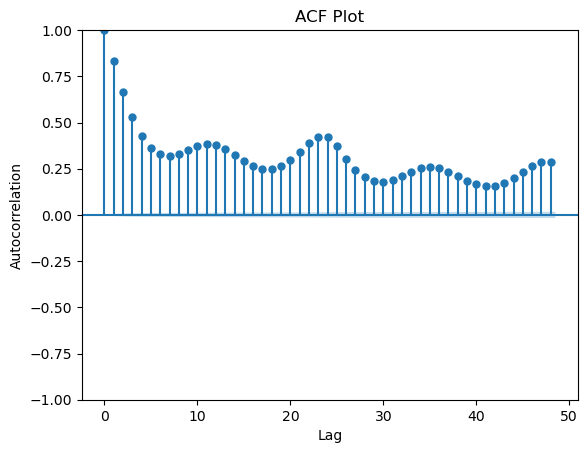

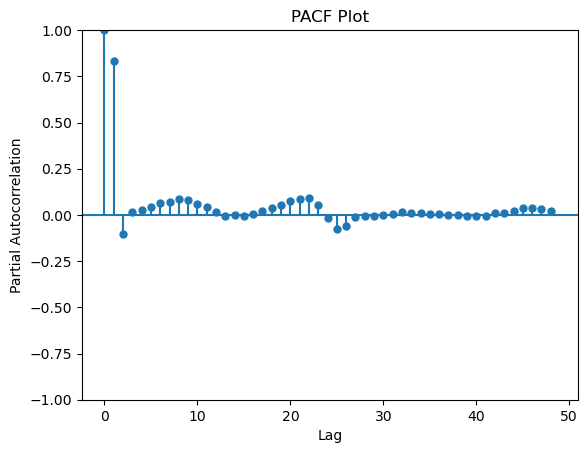

In [7]:
# Plot ACF
plot_acf(data_arima['Value'], lags=48)  # Change lags value according to your data
plt.title('ACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(data_arima['Value'], lags=48)  # Change lags value according to your data
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

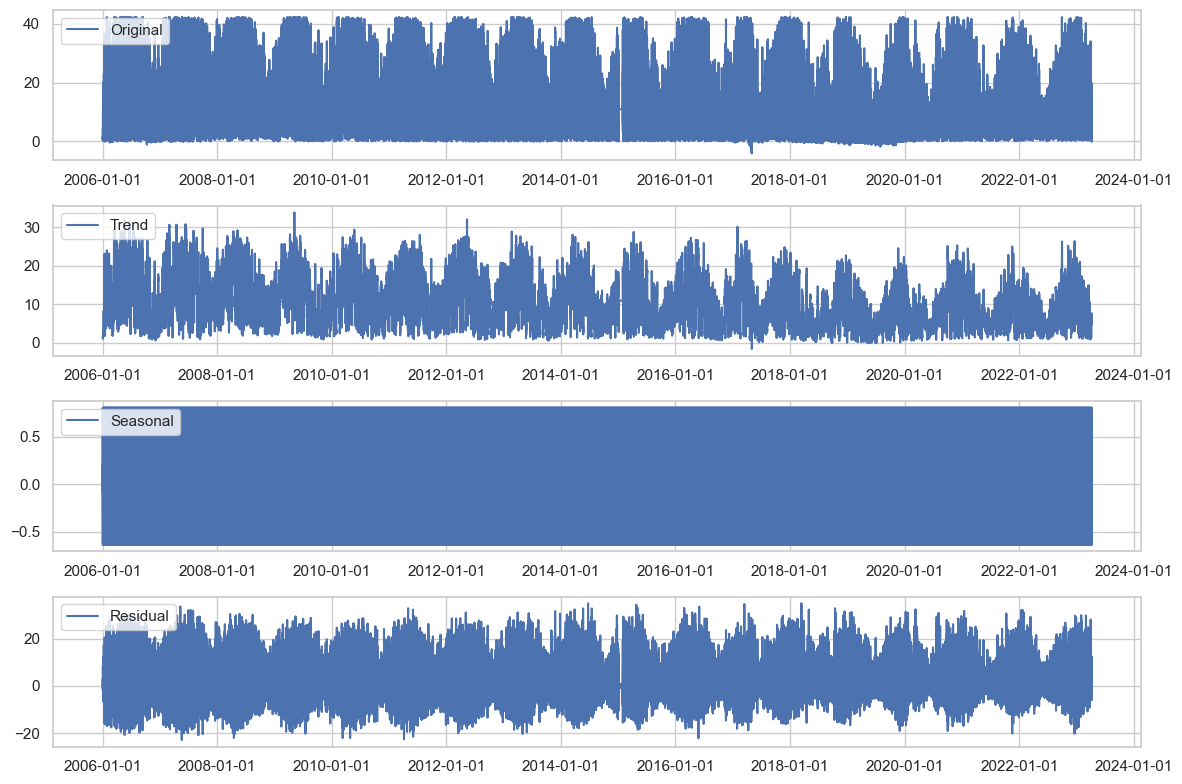

In [162]:
# Convert index to DatetimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

# Set the start date explicitly if needed
start_date = '2006-01-01 00:00'
data_arima.index = pd.date_range(start=start_date, periods=len(data_arima), freq='H')  # Assuming hourly frequency

# Perform seasonal decomposition
result = seasonal_decompose(data_arima['Value'], model='additive', period=24)  # Set period to 24 hours in a day 

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_arima.index, data_arima['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(412)
plt.plot(data_arima.index, result.trend, label='Trend')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(413)
plt.plot(data_arima.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(414)
plt.plot(data_arima.index, result.resid, label='Residual')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data
data_arima = pd.read_csv('No2_data_arima.csv', parse_dates=['DateHour'], index_col='DateHour', dayfirst=True)
# Convert index to DatetimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)


In [ ]:
#Filtering the data_arima to extract Oct-Nov 2024 NO2 values 

In [ ]:
# Recall/read Dataset data_arima 
# load the CSV file
data_arima = pd.read_csv('No2_data_arima.csv')

# Display the first few rows
print(data_arima.head())
print(data_arima.tail(50))

In [ ]:
data_arima.dtypes

In [ ]:
# Convert index to DatatimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

In [ ]:
# Convert DateHour column to datetime format
data_arima['DateHour'] = pd.to_datetime(data_arima['DateHour'], dayfirst = True)

In [ ]:
data_arima.dtypes

In [ ]:
# Filter the data for October and November 2024
filtered_data = data_arima[(data_arima['DateHour'].dt.year == 2024) & (data_arima['DateHour'].dt.month.isin([10, 11]))]

# Display the filtered data
print(filtered_data)

In [ ]:
filtered_data.dtypes

In [ ]:
# Save the the filtered_data into a new csv file so it's easy to recall later on 
filtered_data.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\No2_filtered_data.csv', index=False)

In [ ]:
# ARIMA Model for Oct-Nov2024 dataset 

In [2]:
import pandas as pd

data = pd.read_csv('No2_filtered_data.csv')
print(data.columns)

Index(['DateHour', 'Value'], dtype='object')


In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
#filtered_data = pd.read_csv('No2_filtered_data.csv', parse_dates=['DateHour'], index_col='DateHour', dayfirst=True)
# Load the data
filtered_data = pd.read_csv('No2_filtered_data.csv')

# Create a datetime index manually (assuming hourly data starting from a specific date)
start_date = "2024-10-01 00:00:00"  # Adjust the start date as needed
filtered_data['DateHour'] = pd.date_range(start=start_date, periods=len(filtered_data), freq='H')
filtered_data.set_index('DateHour', inplace=True)


In [4]:

# Handle missing values (if any)
filtered_data['Value'] = filtered_data['Value'].interpolate()

In [5]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [6]:
# Split the data into training and testing sets
train_size = int(len(filtered_data) * 0.8)
train_data = filtered_data.iloc[:train_size]
test_data = filtered_data.iloc[train_size:]

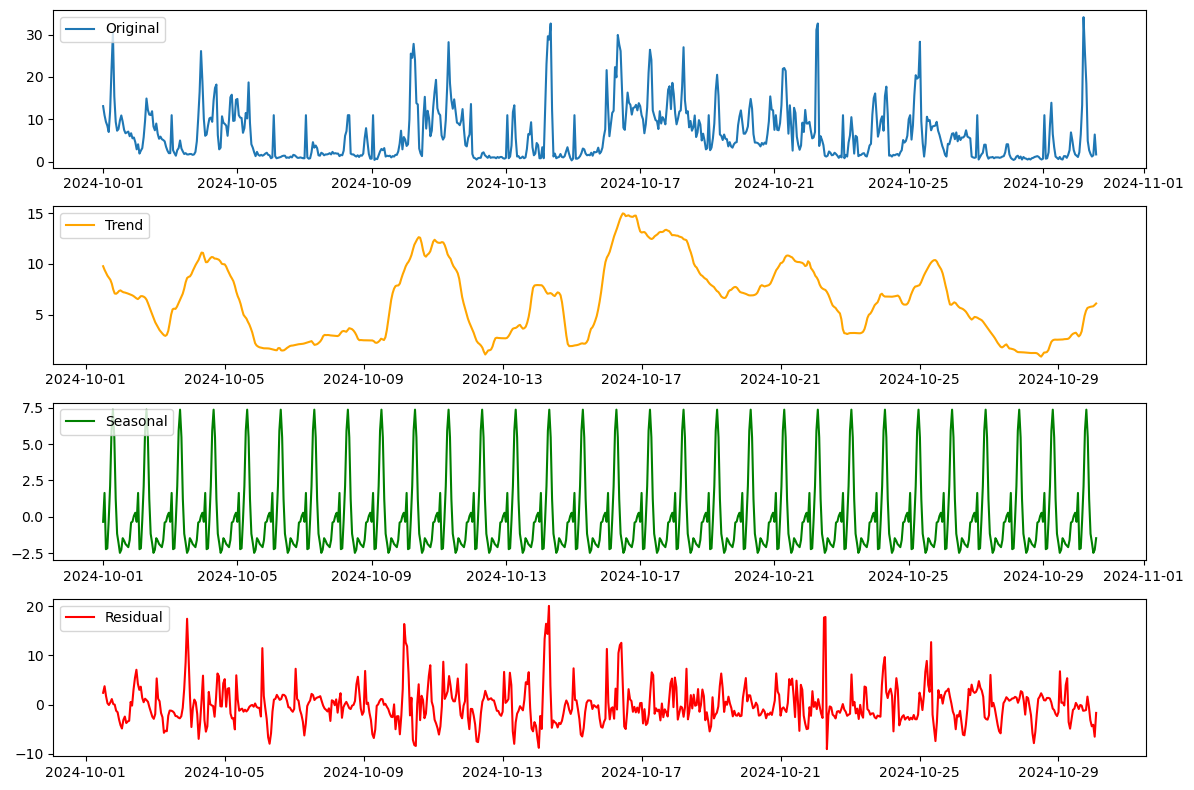

In [7]:
# Perform seasonal decomposition
result = seasonal_decompose(train_data['Value'], model='additive', period=24)  # Assuming hourly data with daily seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(411)
plt.plot(train_data.index, train_data['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Trend component
plt.subplot(412)
plt.plot(train_data.index, result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Seasonal component
plt.subplot(413)
plt.plot(train_data.index, result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Residual component
plt.subplot(414)
plt.plot(train_data.index, result.resid, label='Residual',  color='red')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:

# Fit ARIMA model
model = auto_arima(train_data['Value'], seasonal=True, m=24, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=4633.894, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=3957.480, Time=0.50 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=4173.835, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=5144.743, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=3974.809, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=3945.686, Time=2.50 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=7.67 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(0,0,0)(2,0,0)[24] intercept   : AIC=4578.303, Time=3.32 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=3941.509, Time=3.31 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=3951.976, Time=0.55 sec
 ARIMA(2,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=9.97 sec
 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(3,0,0)(2,0,0)[24] intercept   : AIC=3

In [9]:
# Forecast the next 24 hours
#forecast = model.predict(n_periods=24)
forecast = model.predict(n_periods=len(test_data))
print(forecast)


2024-10-30 15:00:00    2.973419
2024-10-30 16:00:00    3.914939
2024-10-30 17:00:00    4.370417
2024-10-30 18:00:00    4.634967
2024-10-30 19:00:00    4.730698
                         ...   
2024-11-06 20:00:00    6.552462
2024-11-06 21:00:00    6.550432
2024-11-06 22:00:00    6.548080
2024-11-06 23:00:00    6.547164
2024-11-07 00:00:00    6.547117
Freq: H, Length: 178, dtype: float64


In [10]:
# Evaluate the ARIMA model
import numpy as np

mse = mean_squared_error(test_data['Value'], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['Value'], forecast)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R^2 Score: -0.04414172478098788
Mean Squared Error (MSE): 24.363522867593918
Root Mean Squared Error (RMSE): 4.9359419432965295


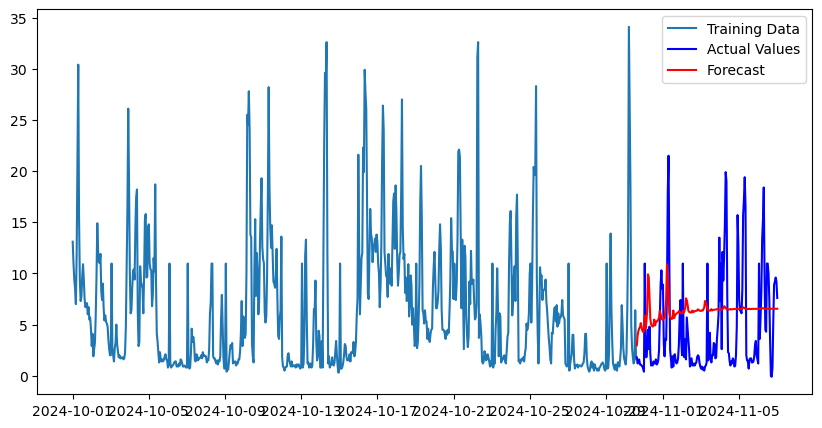

In [11]:

# Plot the forecast vs actual values
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Value'], label='Training Data')
plt.plot(test_data.index, test_data['Value'], label='Actual Values', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
# ML MODELS x 4  

In [ ]:
# Performing Maching Learning Models: 
# SVR: Support Vector Regression is a type of Support Vector Machine that supports linear and non-linear regression. It is effective in high-dimensional spaces and is versatile due to the use of different kernel functions.
#Feature Scaling: SVR is sensitive to the scale of the input features, so scaling is necessary.
#Evaluation: The model is evaluated using Mean Squared Error (MSE) and R² score to understand its performance.

In [1]:
import pandas as pd

# Load the CSV file
data_cleaned = pd.read_csv('NO2_07112024_NoOutliers.csv')

# Display the first few rows
print(data_cleaned.head())
print (data_cleaned.tail())

                   Timestamp  Value  Year  Month  Day  Hour        Date
0  2006-01-01 00:00:00+12:00    1.2  2006      1    1     0  2006-01-01
1  2006-01-01 01:00:00+12:00    0.8  2006      1    1     1  2006-01-01
2  2006-01-01 02:00:00+12:00    0.5  2006      1    1     2  2006-01-01
3  2006-01-01 03:00:00+12:00    0.4  2006      1    1     3  2006-01-01
4  2006-01-01 04:00:00+12:00    0.4  2006      1    1     4  2006-01-01
                        Timestamp  Value  Year  Month  Day  Hour        Date
151359  2024-11-06 20:00:00+12:00    8.9  2024     11    6    20  2024-11-06
151360  2024-11-06 21:00:00+12:00    9.2  2024     11    6    21  2024-11-06
151361  2024-11-06 22:00:00+12:00    9.6  2024     11    6    22  2024-11-06
151362  2024-11-06 23:00:00+12:00    9.2  2024     11    6    23  2024-11-06
151363  2024-11-07 00:00:00+12:00    7.6  2024     11    7     0  2024-11-07


In [2]:

# Load the data
data = data_cleaned[['Timestamp', 'Value']]

In [3]:
data.dtypes


Timestamp     object
Value        float64
dtype: object

In [4]:
print(data.head())

                   Timestamp  Value
0  2006-01-01 00:00:00+12:00    1.2
1  2006-01-01 01:00:00+12:00    0.8
2  2006-01-01 02:00:00+12:00    0.5
3  2006-01-01 03:00:00+12:00    0.4
4  2006-01-01 04:00:00+12:00    0.4


In [5]:
# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


C:\Users\wendy\AppData\Local\Temp\ipykernel_30216\1944390922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [6]:
data.dtypes


Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
data = data.dropna()

# Extract features and target variable
X = data.index.astype(int).values.reshape(-1, 1)  # Use timestamp as a feature
y = data['Value'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR()

Mean Squared Error: 87.58514344123986
R^2 Score: -0.011607152429077727


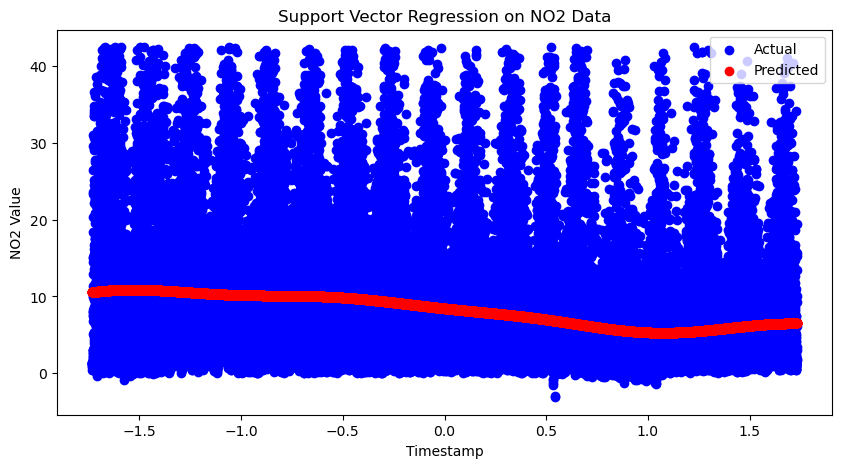

In [20]:
# Evaluate the model: 

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('Support Vector Regression on NO2 Data')
plt.legend()
plt.show()

In [ ]:
# Performing ANN Model: The model consists of an input layer, two hidden layers with ReLU activation, and an output layer for regression.
#Compilation: The model is compiled with the Adam optimizer and Mean Squared Error loss function, which are standard choices for regression tasks.
#Training: The model is trained for 100 epochs with a batch size of 32, and 20% of the training data is used for validation.
#Evaluation: The model's performance is evaluated on the test set, and predictions are plotted to visualize the results.

In [19]:
!pip install tensorflow


In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1))

# Compile the ANN
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 96.9498 - val_loss: 80.4905
Epoch 2/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 82.8166 - val_loss: 80.5303
Epoch 3/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 82.9223 - val_loss: 80.5977
Epoch 4/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 83.4829 - val_loss: 80.3961
Epoch 5/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 83.7033 - val_loss: 80.4566
Epoch 6/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 82.9158 - val_loss: 80.4731
Epoch 7/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 83.2339 - val_loss: 80.5328
Epoch 8/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 82.6683 - val_loss: 80.3755
Epoch 9/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 83.1958 - val_loss: 80.3948
Epoch 10/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 82.7632 - val_loss: 80.4690
Epoch 11/100
3028/3028 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 82.6493 - val_loss: 80.36

947/947 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 82.38787524210197
R^2 Score: 0.048421220840269785


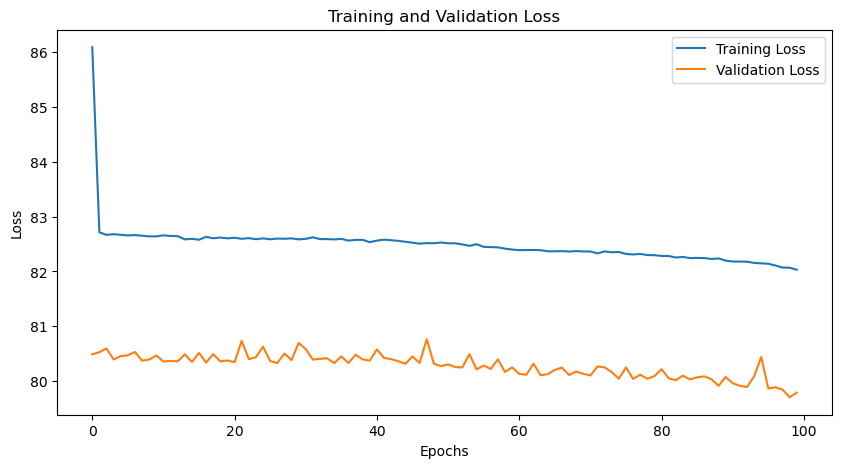

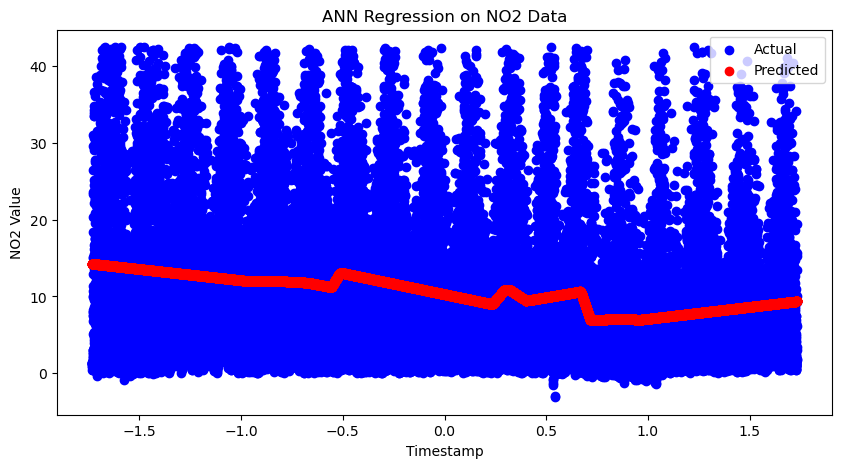

In [22]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('ANN Regression on NO2 Data')
plt.legend()
plt.show()

In [ ]:
# Performing Gradient Boosting (GB)
#Gradient Boosting Regressor: This model builds an ensemble of decision trees, where each tree tries to correct the errors of the previous ones. It is effective for both regression and classification tasks.
#Parameters:
#n_estimators: The number of boosting stages to perform. More stages can improve performance but may lead to overfitting.
#learning_rate: The contribution of each tree to the final prediction. A smaller learning rate requires more trees.
#max_depth: The maximum depth of the individual regression estimators. Deeper trees can capture more complex patterns but may overfit.
#Evaluation: The model is evaluated using Mean Squared Error (MSE) and R² score to understand its performance.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Mean Squared Error: 74.07937057517606
R^2 Score: 0.14438433075618184


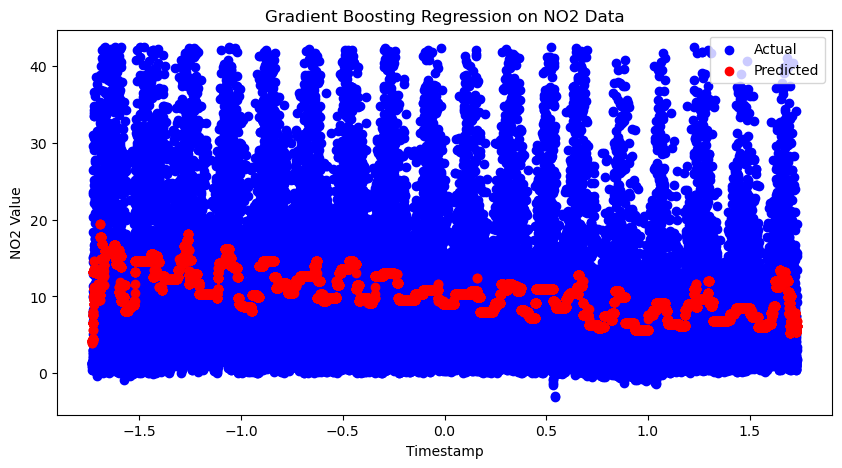

In [11]:
# Evaluate the Model 
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('Gradient Boosting Regression on NO2 Data')
plt.legend()
plt.show()

In [ ]:
# Performing Random Forest (RF)
#Random Forest Regressor: This model builds an ensemble of decision trees, where each tree is trained on a random subset of the data. The final prediction is the average of the predictions from all trees.
#Parameters:
#n_estimators: The number of trees in the forest. More trees can improve performance but increase computation time.
#max_depth: The maximum depth of the trees. Deeper trees can capture more complex patterns but may overfit. Setting it to None allows nodes to expand until all leaves are pure or contain less than min_samples_split samples.
#Evaluation: The model is evaluated using Mean Squared Error (MSE) and R² score to understand its performance.

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 20.9620749898467
R^2 Score: 0.7578883340676366


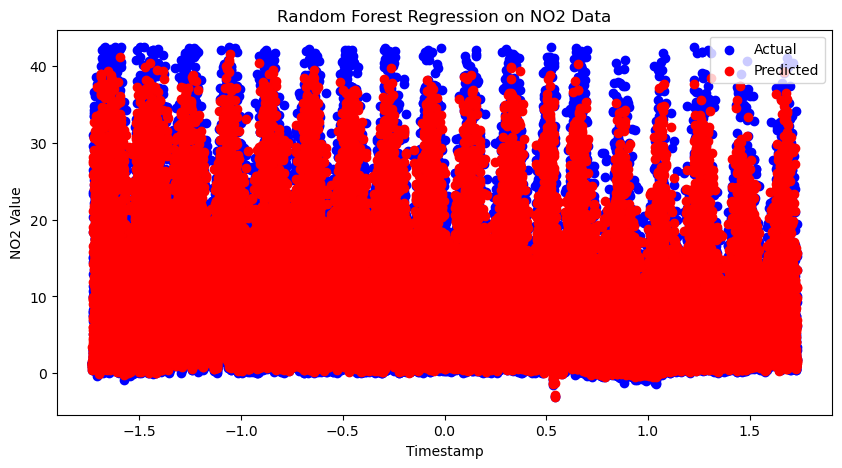

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('Random Forest Regression on NO2 Data')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning with Grid Search


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Perform the Grid Search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 20.88390582808527
R^2 Score: 0.7587911867665111


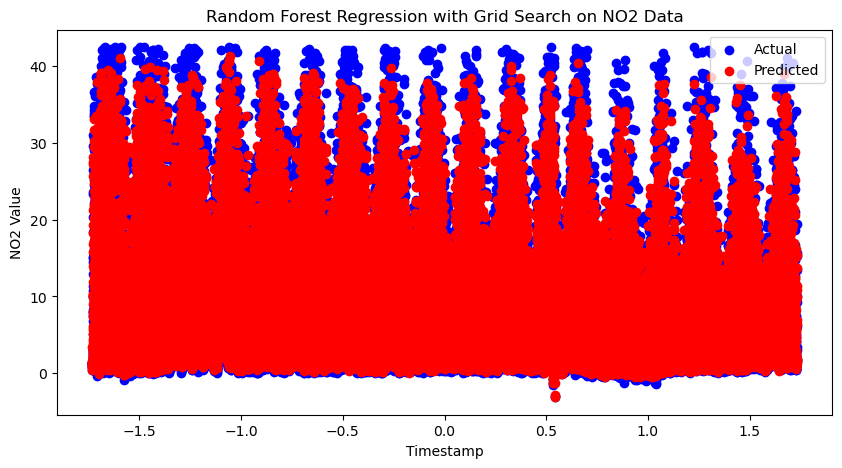

In [15]:
# Evaluate the best Model
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('Random Forest Regression with Grid Search on NO2 Data')
plt.legend()
plt.show()

In [25]:
# Performing Hyperparameter Tuning with Random Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
  'n_estimators': randint(50, 200),
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': randint(2, 11),
  'min_samples_leaf': randint(1, 5),
  'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the Random Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Perform the Random Search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000268D30E2CD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000268CAD7F250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026786410210>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 196}
Mean Squared Error: 20.946696806709973
R^2 Score: 0.7580659518626328


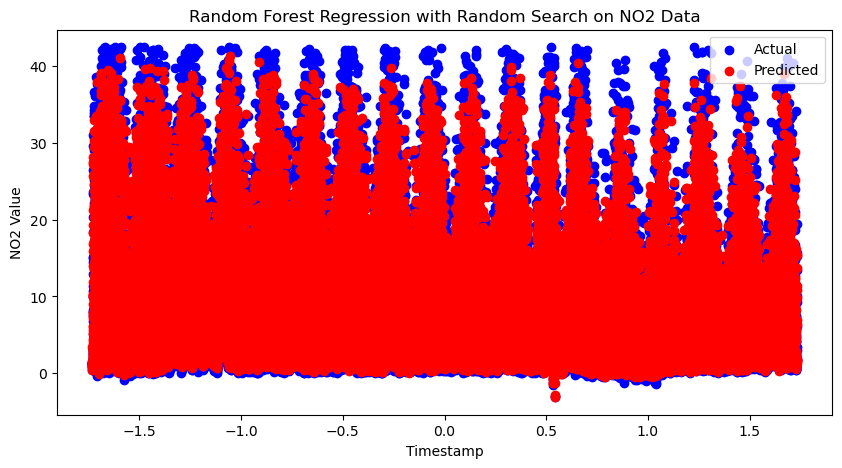

In [26]:
# Evaluate the Best Model
# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.title('Random Forest Regression with Random Search on NO2 Data')
plt.legend()
plt.show()